In [1]:
#AI-ML Project: Sentiment Analysis 

# Team Members:         SID:
#  Harshit Gulati       22101012
#  Parth Sauguny        22101027
#  Aniket Tiwari        22101030

In [1]:
import time 
import numpy as np
import pandas as pd
import re
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [2]:
import nltk

In [3]:
print(stopwords.words('english')) #words that are not required for the ML model

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Data Processing

In [5]:
#loading csv file to pd dataframe
twitter_data = pd.read_csv('./training.1600000.processed.noemoticon.csv', encoding = 'ISO-8859-1')

In [6]:
twitter_data.replace({'target' : {4:1}}, inplace = True)
twitter_data = twitter_data.dropna()

In [7]:
#checking number of rows and columns in the dataframe
twitter_data.shape

(1599505, 7)

In [8]:
#printing first five rows of the dataframe
twitter_data.head()

,target,id,date,flag,user,text,stemmed_content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see


In [10]:
#naming the columns
column_names = ['target', 'id', 'date', 'flag', 'user', 'text']
twitter_data = pd.read_csv('./training.1600000.processed.noemoticon.csv', names=column_names, encoding = 'ISO-8859-1')

C:\Users\PARTH\AppData\Local\Temp\ipykernel_1524\4200416942.py:3: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  twitter_data = pd.read_csv('./training.1600000.processed.noemoticon.csv', names=column_names, encoding = 'ISO-8859-1')


In [9]:
twitter_data.shape

(1599505, 7)

In [22]:
#printing first five rows of the dataframe
twitter_data.head()

,target,id,date,flag,user,text
target,id,date,flag,user,text,stemmed_content
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire


In [11]:
#counting number of null values
twitter_data.isnull().sum()

target      0
id          0
date        0
flag        0
user        0
text      495
dtype: int64

In [24]:
#checking distribution of target column
twitter_data['target'].value_counts()

target
2002951254    2
2011968786    2
2003179555    2
1955871432    2
2015680799    2
             ..
2197261073    1
2197260895    1
2197260300    1
2197260225    1
2193602129    1
Name: count, Length: 1598736, dtype: int64

# Data Visualization

In [12]:
#replacing value of 4 with 1 in the target column
twitter_data.replace({'target' : {4:1}}, inplace = True)

In [28]:
#checking the replaced values
twitter_data['target'].value_counts()

target
2002951254    2
2011968786    2
2003179555    2
1955871432    2
2015680799    2
             ..
2197261073    1
2197260895    1
2197260300    1
2197260225    1
2193602129    1
Name: count, Length: 1598736, dtype: int64

In [14]:
# 0 --> negative
# 1 --> positive

In [14]:
#Plotting the distribution for the dataset
sns.countplot(x='target', data=twitter_data)
# Set custom labels on the x-axis
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.title('Distribution of data')
plt.show()


KeyboardInterrupt



# Data Preprocessing

In [16]:
#stemming - the process of reducing a word to its Root word

In [9]:
port_stem = PorterStemmer()

In [10]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [12]:
twitter_data['stemmed_content'] = twitter_data['text'].apply(stemming)

KeyboardInterrupt: 

In [ ]:
twitter_data[['stemmed_content']].to_csv('./training.1600000.processed.noemoticon.csv', index=False)

In [10]:
twitter_data.head()

,target,id,date,flag,user,text,stemmed_content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see


In [39]:
print(twitter_data['stemmed_content'])

0          switchfoot http twitpic com zl awww bummer sho...
1          upset updat facebook text might cri result sch...
2          kenichan dive mani time ball manag save rest g...
3                            whole bodi feel itchi like fire
4                              nationwideclass behav mad see
                                 ...                        
1599995                           woke school best feel ever
1599996    thewdb com cool hear old walt interview http b...
1599997                         readi mojo makeov ask detail
1599998    happi th birthday boo alll time tupac amaru sh...
1599999    happi charitytuesday thenspcc sparkschar speak...
Name: stemmed_content, Length: 1600000, dtype: object


In [11]:
print(twitter_data['target'])

0          0
1          0
2          0
3          0
4          0
          ..
1599995    4
1599996    4
1599997    4
1599998    4
1599999    4
Name: target, Length: 1600000, dtype: int64


In [12]:
#separating data and label
X = twitter_data['stemmed_content'].values
Y = twitter_data['target'].values

In [13]:
#separating positive and negative tweets
tweets_pos = twitter_data[twitter_data['target'] == 1]['stemmed_content']
tweets_neg = twitter_data[twitter_data['target'] == 0]['stemmed_content']

In [14]:
#Plot a cloud of words for positive tweets
plt.figure(figsize = (20,20))
word_cloud = WordCloud(max_words = 1000, width = 1600, height = 800, collocations = False).generate(" ".join(tweets_pos))
plt.imshow(word_cloud)

ValueError: We need at least 1 word to plot a word cloud, got 0.

<Figure size 2000x2000 with 0 Axes>

In [8]:
#Plot a cloud of words for negative tweets
plt.figure(figsize = (20,20))
word_cloud = WordCloud(max_words = 1000, width = 1600, height = 800, collocations = False).generate(" ".join(tweets_neg))
plt.imshow(word_cloud)

TypeError: sequence item 3997: expected str instance, float found

<Figure size 2000x2000 with 0 Axes>

# Splitting data into Train and Test Subset

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)

NameError: name 'X' is not defined

In [46]:
print(X.shape, X_train.shape, X_test.shape)

(1600000,) (1280000,) (320000,)


# Using TF-IDF Vectorizer to transform the data

In [47]:
#converting textual data to numerical values
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [48]:
print(X_train)

  (0, 443066)	0.4484755317023172
  (0, 235045)	0.41996827700291095
  (0, 109306)	0.3753708587402299
  (0, 185193)	0.5277679060576009
  (0, 354543)	0.3588091611460021
  (0, 436713)	0.27259876264838384
  (1, 160636)	1.0
  (2, 288470)	0.16786949597862733
  (2, 132311)	0.2028971570399794
  (2, 150715)	0.18803850583207948
  (2, 178061)	0.1619010109445149
  (2, 409143)	0.15169282335109835
  (2, 266729)	0.24123230668976975
  (2, 443430)	0.3348599670252845
  (2, 77929)	0.31284080750346344
  (2, 433560)	0.3296595898028565
  (2, 406399)	0.32105459490875526
  (2, 129411)	0.29074192727957143
  (2, 407301)	0.18709338684973031
  (2, 124484)	0.1892155960801415
  (2, 109306)	0.4591176413728317
  (3, 172421)	0.37464146922154384
  (3, 411528)	0.27089772444087873
  (3, 388626)	0.3940776331458846
  (3, 56476)	0.5200465453608686
  :	:
  (1279996, 390130)	0.22064742191076112
  (1279996, 434014)	0.2718945052332447
  (1279996, 318303)	0.21254698865277746
  (1279996, 237899)	0.2236567560099234
  (1279996, 2910

In [49]:
print(X_test)

  (0, 420984)	0.17915624523539803
  (0, 409143)	0.31430470598079707
  (0, 398906)	0.3491043873264267
  (0, 388348)	0.21985076072061738
  (0, 279082)	0.1782518010910344
  (0, 271016)	0.4535662391658828
  (0, 171378)	0.2805816206356073
  (0, 138164)	0.23688292264071403
  (0, 132364)	0.25525488955578596
  (0, 106069)	0.3655545001090455
  (0, 67828)	0.26800375270827315
  (0, 31168)	0.16247724180521766
  (0, 15110)	0.1719352837797837
  (1, 366203)	0.24595562404108307
  (1, 348135)	0.4739279595416274
  (1, 256777)	0.28751585696559306
  (1, 217562)	0.40288153995289894
  (1, 145393)	0.575262969264869
  (1, 15110)	0.211037449588008
  (1, 6463)	0.30733520460524466
  (2, 400621)	0.4317732461913093
  (2, 256834)	0.2564939661498776
  (2, 183312)	0.5892069252021465
  (2, 89448)	0.36340369428387626
  (2, 34401)	0.37916255084357414
  :	:
  (319994, 123278)	0.4530341382559843
  (319995, 444934)	0.3211092817599261
  (319995, 420984)	0.22631428606830145
  (319995, 416257)	0.23816465111736276
  (319995, 3

# Model Evauluation Function

In [15]:
def evaluate_model(model):
    # predicting values for test subset
    X_test_prediction = model.predict(X_test)
    print(classification_report(Y_test, X_test_prediction))
    #plotting the confusion matrix
    c_matrix = confusion_matrix(Y_test, X_test_prediction)
    categories = ['Negative', 'Positive']
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_percentages = ['{0:0.2%}'.format(value) for value in c_matrix.flatten() / np.sum(c_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(c_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    
    #Plotting ROC-AUC curve
    fpr, tpr, thresholds = roc_curve(Y_test, X_test_prediction)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC CURVE')
    plt.legend(loc="lower right")
    plt.show()

 # Model Building

## Logistic Regression

In [16]:
model = LogisticRegression(max_iter=1000, n_jobs = -1)
start = time.time()
model.fit(X_train, Y_train)
end = time.time()
#model evaluation
print("The execution time of this model is {:.2f} seconds\n".format(end-start))
evaluate_model(model)

NameError: name 'X_train' is not defined

## Bernoulli NB

The execution time of this model is 0.29 seconds

              precision    recall  f1-score   support

           0       0.75      0.79      0.77    160000
           1       0.78      0.74      0.76    160000

    accuracy                           0.76    320000
   macro avg       0.77      0.76      0.76    320000
weighted avg       0.77      0.76      0.76    320000



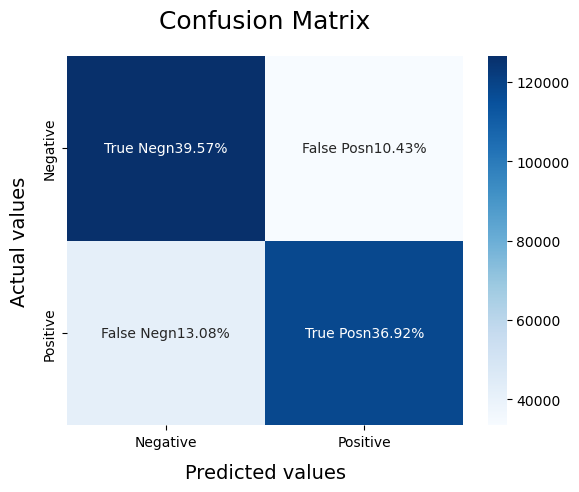

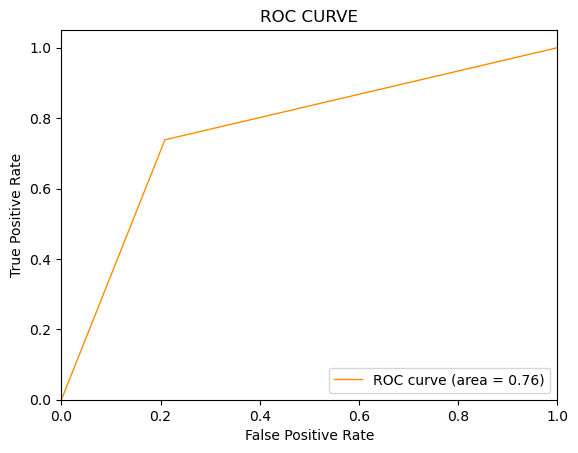

In [52]:
BNBmodel = BernoulliNB()
start = time.time()
BNBmodel.fit(X_train, Y_train)
end = time.time()
#model evaluation
print("The execution time of this model is {:.2f} seconds\n".format(end-start))
evaluate_model(BNBmodel)

## Support Vector Machine

C:\Users\Harshit Gulati\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


The execution time of this model is 20.08 seconds

              precision    recall  f1-score   support

           0       0.78      0.76      0.77    160000
           1       0.76      0.78      0.77    160000

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



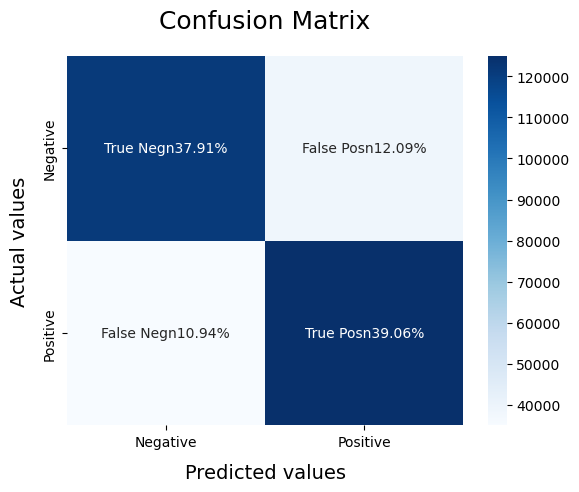

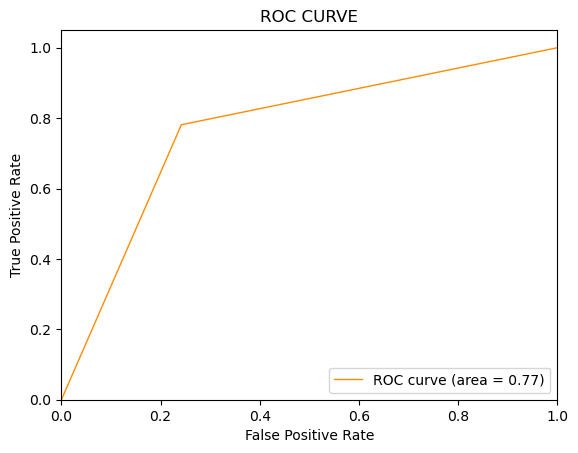

In [53]:
SVCmodel = LinearSVC()
start = time.time()
SVCmodel.fit(X_train, Y_train)
end = time.time()
print("The execution time of this model is {:.2f} seconds\n".format(end-start))
evaluate_model(SVCmodel)

# Saving the best trained model

In [54]:
import pickle

In [56]:
filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

## Using the saved model to predict

In [58]:
saved_model = pickle.load(open('./trained_model.sav', 'rb'))

In [62]:
X_to_be_predicted = X_test[333]
if(Y_test[333] == 0):
    print('Negative Tweet')
else:
    print('Positive Tweet')

Negative Tweet


In [63]:
prediction = saved_model.predict(X_to_be_predicted)
if(prediction[0] == 0):
    print('Negative Tweet')
else:
    print('Positive Tweet')

Negative Tweet


In [ ]:
#Conclusion: 

# Hence, a ML model is prepared that analyses the sentiments based on the words in a sentence.
#F1 Score: 0.77